In [6]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sn
plot_params = {'color': '0.75',
                'style': '.-',
                'markeredgecolor': '0.25',
                'markerfacecolor': '0.25',
                'legend': False}
sn.set_style("dark")
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())
def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()
def mae(y, y_pred):
    return ((y - y_pred).abs()).mean()
def mape(y, y_pred):
    return ((y - y_pred).abs() / y).mean() * 100
def evaluate(y, y_pred):
    print("MAE:", mae(y, y_pred))
    #print("MSE:", mse(y, y_pred))
    print("RMSE:", rmse(y, y_pred))
    print("MAPE:", mape(y, y_pred))

# AR
AR (Autoregressive) models are a class of time series models that use the past values of a variable to predict its future values. AR models assume that the future value of a variable depends on its past values and a random error term.

The basic idea behind AR models is that the value of a variable at time t is a linear combination of its past values, with the weights determined by the autoregressive parameters of the model. Mathematically, an AR(p) model can be written as:

y(t) = c + φ1y(t-1) + φ2y(t-2) + ... + φp*y(t-p) + ε(t)

where y(t) is the value of the variable at time t, c is a constant, φ1 to φp are the autoregressive parameters of the model, ε(t) is a random error term, and p is the order of the AR model.

To use an AR model for time series forecasting, we need to estimate the values of the autoregressive parameters φ1 to φp. This can be done using various methods, such as the Yule-Walker equations, the Burg algorithm, or maximum likelihood estimation.

Once the autoregressive parameters are estimated, we can use the AR model to make forecasts for future values of the variable. To do this, we need to provide the model with the past values of the variable up to time t-p, and the model will then use these values to predict the value of the variable at time t.

                            AutoReg Model Results                             
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                     AutoReg(3)   Log Likelihood                -684.430
Method:               Conditional MLE   S.D. of innovations             31.037
Date:                Sat, 29 Apr 2023   AIC                           1378.860
Time:                        22:36:41   BIC                           1393.603
Sample:                    04-01-1949   HQIC                          1384.851
                         - 12-01-1960                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.6410      6.872      1.985      0.047       0.172      27.110
#Passengers.L1     1.3482      0.084     16.025      0.000       1.183       1.513
#Passengers.L2    -0.5918      0.136

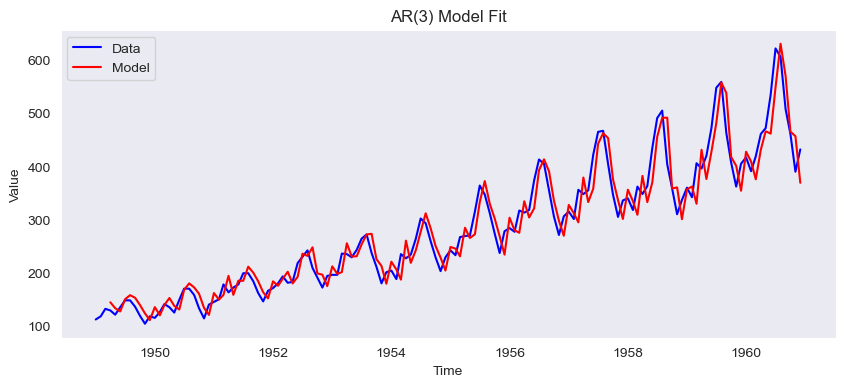

In [8]:
# Read time series data from a CSV file into a pandas DataFrame
data = pd.read_csv('AirPassengers.csv', index_col=0, parse_dates=True)
# Fit an AR(3) model to the data
model = sm.tsa.AutoReg(data, lags=3).fit()

# Print the model summary
print(model.summary())

# Visualize the data and the model predictions
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data, linewidth=1.5, color='blue', label='Data')
ax.plot(model.fittedvalues, linewidth=1.5, color='red', label='Model')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('AR(3) Model Fit')
ax.legend()
plt.show()

In [9]:
# Make a forecast of the next 10 values of the time series
forecast = model.predict(start=0, end=len(data))
# Print the forecast
print(forecast)

1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01    144.374255
1949-05-01    133.254737
                 ...    
1960-09-01    570.518393
1960-10-01    465.420223
1960-11-01    456.824753
1960-12-01    369.138237
1961-01-01    458.298818
Freq: MS, Length: 145, dtype: float64


In [11]:
evaluate(data['#Passengers'], forecast)

MAE: 24.81905226266121
RMSE: 31.036801854296787
MAPE: 8.94869972546318
